# Task -2 Model Fitting Using Machine learning Models 

In [4]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE  
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.combine import SMOTEENN  
%matplotlib inline

In [5]:
cust_df = pd.read_csv("\Data Analysis With Python\GDSC_ML_Task\data\processed_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Sian\AppData\Local\Temp\ipykernel_23876\48593022.py:1: SyntaxWarning: invalid escape sequence '\D'
  cust_df = pd.read_csv("\Data Analysis With Python\GDSC_ML_Task\data\processed_data.csv")


In [6]:
cust_df.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,29.85,29.85,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,34,56.95,1889.50,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,2,53.85,108.15,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,45,42.30,1840.75,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,2,70.70,151.65,1.0


In [7]:
print(f"Outcome Distribution in the Dataset : \n {cust_df['Churn'].value_counts() / cust_df.shape[0]}")

Outcome Distribution in the Dataset : 
 Churn
0.0    0.734215
1.0    0.265785
Name: count, dtype: float64


In [8]:
cust_df.isnull().sum()

gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProt

In [9]:
minmax_scaler = MinMaxScaler()

In [10]:
cust_df[['MonthlyCharges', 'TotalCharges']] = minmax_scaler.fit_transform(cust_df[['MonthlyCharges', 'TotalCharges']])

#### Scaling Down the TotalCharges and MonthlyCharges

In [11]:
cust_df.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,1,0.115423,0.001275,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,34,0.385075,0.215867,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,2,0.354229,0.010310,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,45,0.239303,0.210241,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,2,0.521891,0.015330,1.0


In [12]:
cust_df.shape

(7032, 46)

In [13]:
cust_df.columns

Index(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_

## X_train, Y_train  , x_test, y_test Split

In [14]:
# Making the X and Y Train

X = cust_df[['PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','gender_Female', 'gender_Male',
       'Contract_One year',
       'Contract_Two year','Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 
       'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]

Y = cust_df['Churn']

In [15]:
X.shape

(7032, 45)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=42)

## Implementig Logistic Regression

In [407]:
linear_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='newton-cholesky')

In [408]:
lin_y_predict = linear_model.predict(x_test)

In [409]:
print(f"classification_report for Logistic Regression is : \n {classification_report(y_test,lin_y_predict)}")

classification_report for Logistic Regression is : 
               precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1033
         1.0       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [410]:
# Printing the weights Generated By Logistic Model For Each Features :
weight_list_linear=list(linear_model.coef_.flatten())
print(weight_list_linear)
dict_w = {
    'ColumnName': X.columns,
    'WeightValues':weight_list_linear

}

feature_importance=pd.DataFrame(dict_w)
# This Dataframe can be plotted to extract the feature importance of various attribtues

[-0.13671423412273234, 0.13671423412273268, -0.017446165585237938, -0.1561003900278453, 0.2442016247117603, -0.07065506909869837, 0.01585066399331902, -0.01585066399331181, -0.07598593785785725, -0.6134901142200179, -0.02606754313289317, 0.026067543132886194, 0.11141076488651049, -0.11141076488651434, 0.11609842073144849, -0.1160984207314469, -0.18346047929476494, 0.11609842073144848, 0.06736205856331681, -0.3949172481893311, 0.4973701832512506, -0.10245293506191912, 0.26346161806863955, -0.10245293506191913, -0.16100868300670726, 0.09743920342725852, -0.10245293506191913, 0.005013731634653536, 0.047688342383289645, -0.10245293506191912, 0.0547645926786322, 0.24906129795244367, -0.10245293506191912, -0.14660836289052065, -0.08670005589321139, -0.10245293506191913, 0.18915299095513669, -0.09557587847034502, -0.10245293506191913, 0.1980288135322602, 0.6894760520778683, 0.258251771285114, -0.05265888828769798, -0.27027012550431895, 1.9571945789744076]


In [411]:
feature_importance.sort_values('WeightValues',ascending=False).head(30)

,ColumnName,WeightValues
44,TotalCharges,1.957195
40,Contract_Month-to-month,0.689476
20,InternetService_Fiber optic,0.497370
22,OnlineSecurity_No,0.263462
41,SeniorCitizen,0.258252
31,TechSupport_No,0.249061
4,PaymentMethod_Electronic check,0.244202
39,StreamingMovies_Yes,0.198029
36,StreamingTV_Yes,0.189153
1,PaperlessBilling_Yes,0.136714


In [412]:
confusion_matrix(y_test,lin_y_predict)

array([[918, 115],
       [180, 194]], dtype=int64)

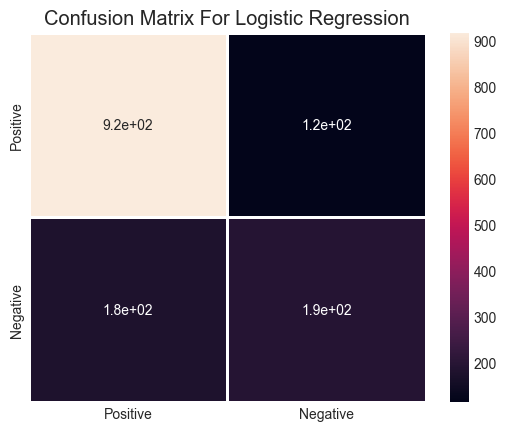

In [413]:
x_label=['Positive','Negative']
y_label=['Positive','Negative']
plt.title("Confusion Matrix For Logistic Regression")
sns.heatmap(confusion_matrix(y_test,lin_y_predict),annot=True,linewidths=1,xticklabels=x_label,yticklabels=y_label);

In [414]:
# Here we will be predicting probabilites as we require probabilites of postive class   as  we determine it at various thresholds
y_probab=linear_model.predict_proba(x_test)[:,1]

false_postive_r,true_positive_r,thresh=roc_curve(y_test,y_probab)
auc_score = roc_auc_score(y_test, y_probab)
# print(plt.style.available)

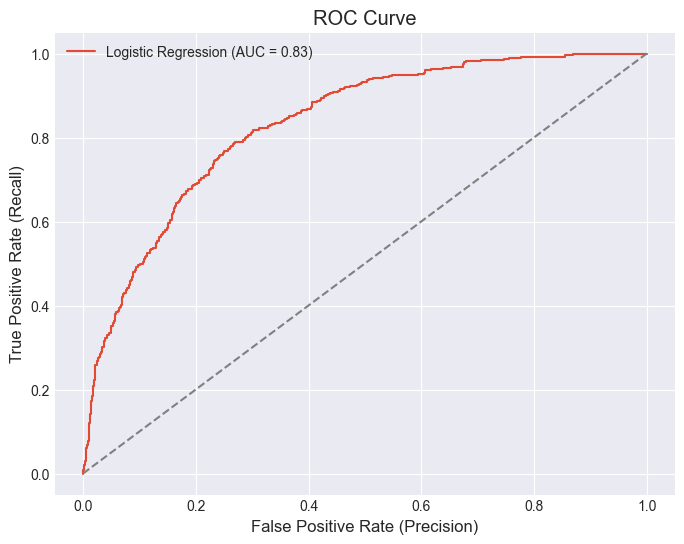

In [415]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-v0_8-dark')
plt.grid(True)
plt.plot(false_postive_r, true_positive_r, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Implementing GridSearch For Logistic Regression

In [416]:
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l2','l1'],        
    'max_iter': [100, 200, 300],
    'solver' :['liblinear']     
}


grid_search_logistic = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid=param_grid_logistic, cv=5, n_jobs=-1,error_score='raise')

In [418]:
grid_search_logistic.fit(x_train,y_train)

exception calling callback for <Future at 0x20ef20307d0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\parallel.py", line 360, in __call__
    n_jobs=default_parallel_config["n_jobs"],
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\parallel.py", line 797, in dispatch_next
    # main thread when calling `get_result`.
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\parallel.py", line 864, in dispatch_one_batch
    #            This method can be called either in the main thread         #
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sian\AppData\Local\Prog

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [419]:
grid_search_logistic.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [363]:
grid_search_logistic.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

#### Implementing the Sampling Techinues  

Combined Sampling Using SMOTEEN

In [420]:
combined_sampling = SMOTEENN(random_state=42)
X_resampled, y_resampled = combined_sampling.fit_resample(x_train, y_train)
print(pd.Series(y_resampled).value_counts())


Churn
1.0    3300
0.0    2140
Name: count, dtype: int64


Fitting Data on the Sampled Data 

In [421]:
linear_model_sampled=LogisticRegression(max_iter=1000,random_state=42)
linear_model_sampled.fit(X_resampled,y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [422]:
lin_ysampled_pred=linear_model_sampled.predict(x_test)
# Predicting the text data on newly fitted model with sampled data

In [423]:
print(f"classification_report for Logistic Regression using Sampled Data  is : \n {classification_report(y_test,lin_ysampled_pred)}")

classification_report for Logistic Regression using Sampled Data  is : 
               precision    recall  f1-score   support

         0.0       0.93      0.60      0.73      1033
         1.0       0.44      0.88      0.59       374

    accuracy                           0.68      1407
   macro avg       0.69      0.74      0.66      1407
weighted avg       0.80      0.68      0.69      1407



#### But we Know that Attributes Like 
1. PaperLessBilling is very Much Irrelevant
2. Bank Transfer
3. Payment_Method

## Implementing Decision Tree Based Models 

In [364]:
dst= DecisionTreeClassifier(random_state=42,max_depth=6,criterion='entropy')

In [365]:
dst.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)

In [366]:
dst_y_predict = dst.predict(x_test)

In [367]:
print(f"classification_report for Decision Trees is : \n {classification_report(y_test,dst_y_predict)}")

classification_report for Decision Trees is : 
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1033
         1.0       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



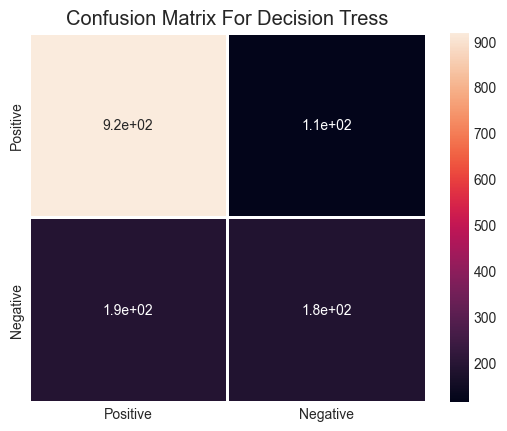

In [325]:
x_label=['Positive','Negative']
y_label=['Positive','Negative']
plt.title("Confusion Matrix For Decision Tress")
sns.heatmap(confusion_matrix(y_test,dst_y_predict),annot=True,linewidths=1,xticklabels=x_label,yticklabels=y_label);

In [368]:
para_grid={
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth':[x for x in range(1,21)]
}

In [427]:
grid_1=GridSearchCV(DecisionTreeClassifier(),param_grid=para_grid,cv=10,error_score='raise')
grid_1.fit(X_resampled,y_resampled)

GridSearchCV(cv=10, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]})

In [428]:
grid_1.best_score_

0.9382352941176471

In [429]:
grid_1.best_params_

{'criterion': 'entropy', 'max_depth': 12}

#### Implementing Sampling Techniques

In [435]:
# We will be Using the data which is already sampled above :
dst_sampled_model=DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=12)
dst_sampled_model.fit(X_resampled,y_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)

In [436]:
dst_ysampled_pred=dst_sampled_model.predict(x_test)
print(f"classification_report for Logistic Regression using Sampled Data  is : \n {classification_report(y_test,dst_ysampled_pred)}")

classification_report for Logistic Regression using Sampled Data  is : 
               precision    recall  f1-score   support

         0.0       0.88      0.68      0.76      1033
         1.0       0.45      0.74      0.56       374

    accuracy                           0.69      1407
   macro avg       0.66      0.71      0.66      1407
weighted avg       0.76      0.69      0.71      1407



## Implementing Random Forest Classifier

In [372]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200) 

In [373]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200)

In [374]:
rfc_y_predict=rfc.predict(x_test)

In [376]:
print(f"classification_report for Random Forest Classifier is : \n {classification_report(y_test,rfc_y_predict)}")

classification_report for Random Forest Classifier is : 
               precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1033
         1.0       0.66      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



In [377]:
param_grid_rfc = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [ 'sqrt', 'log2'],  
    'criterion': ['gini', 'entropy']  
}

In [378]:
grid_rfc=GridSearchCV(RandomForestClassifier(),param_grid=param_grid_rfc,cv=5,n_jobs=-1,error_score='raise')

In [379]:
grid_rfc.fit(x_train,y_train)

c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [380]:
grid_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [381]:
grid_rfc.best_score_

0.8049777777777777

## Implementing XGoost Algorithm

In [382]:
xgb_model= XGBClassifier()

In [383]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [384]:
xgb_y_pred=xgb_model.predict(x_test)

In [385]:
print(f"classification_report for Decision Trees is : \n {classification_report(y_test,xgb_y_pred)}")

classification_report for Decision Trees is : 
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1033
         1.0       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [386]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],         
    'max_depth': [3, 5, 7, 9],               
    'learning_rate': [0.01, 0.1, 0.2],       
    'subsample': [0.6, 0.8, 1.0],           
    'colsample_bytree': [0.6, 0.8, 1.0],     
    'gamma': [0, 0.1, 0.2]                  
}

In [387]:
grid_xgb=GridSearchCV(XGBClassifier(),param_grid=param_grid_xgb,cv=10,n_jobs=-1)
grid_xgb.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]})

In [388]:
grid_xgb.best_score_

0.8051639349443438

## Implementing Iterative Format For Model Fitting 

In [22]:
models ={
    "Logistic Regression":LogisticRegression(max_iter=1000),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'XG Boost' : XGBClassifier(),
    'Support Vector Machine' : SVC()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    # Fitting the Model
    model.fit(x_train,y_train)

    # Making the Prediction on the Test Data and the Train Data :
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    # Performance of Model Training Set : 
    model_train_accuracy= accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision= precision_score(y_train,y_train_pred)
    model_train_recall= recall_score(y_train,y_train_pred)
    model_train_rocauc_score= roc_auc_score(y_train,y_train_pred)


    # Performance of Model on  Testing Set
    model_test_accuracy= accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision= precision_score(y_test,y_test_pred)
    model_test_recall= recall_score(y_test,y_test_pred)
    model_test_rocauc_score= roc_auc_score(y_test,y_test_pred)


    print(list(models.keys())[i])


    print("Model Performance for Training Set ")
    print("-Accuracy : {:.4f}".format(model_train_accuracy))
    print("-F1-Score : {:.4f}".format(model_train_f1))
    print("-Precision : {:.4f}".format(model_train_precision))
    print("-Recall : {:.4f}".format(model_train_recall))    
    print("-ROC-AUC Score : {:.4f}".format(model_train_rocauc_score))


    print("-----------------------------------------------------------------")

    # Model Performance for Test Set : 

    print("Model Performance for Test Set ")
    print("-Accuracy : {:.4f}".format(model_test_accuracy))
    print("-F1-Score : {:.4f}".format(model_test_f1))
    print("-Precision : {:.4f}".format(model_test_precision))
    print("-Recall : {:.4f}".format(model_test_recall))    
    print("-ROC-AUC Score : {:.4f}".format(model_test_rocauc_score))


    print('*'*30)
    print('\n')


Logistic Regression
Model Performance for Training Set 
-Accuracy : 0.8076
-F1-Score : 0.8021
-Precision : 0.6638
-Recall : 0.5599
-ROC-AUC Score : 0.7286
-----------------------------------------------------------------
Model Performance for Test Set 
-Accuracy : 0.7903
-F1-Score : 0.7836
-Precision : 0.6278
-Recall : 0.5187
-ROC-AUC Score : 0.7037
******************************


Decision Tree
Model Performance for Training Set 
-Accuracy : 0.9977
-F1-Score : 0.9977
-Precision : 0.9987
-Recall : 0.9926
-ROC-AUC Score : 0.9961
-----------------------------------------------------------------
Model Performance for Test Set 
-Accuracy : 0.7257
-F1-Score : 0.7281
-Precision : 0.4848
-Recall : 0.5134
-ROC-AUC Score : 0.6579
******************************


Random Forest Classifier
Model Performance for Training Set 
-Accuracy : 0.9977
-F1-Score : 0.9977
-Precision : 0.9947
-Recall : 0.9967
-ROC-AUC Score : 0.9974
-----------------------------------------------------------------
Model Perf

## Hyperparameter Tunning using GridSearchCV

In [31]:
# Specify Parameters for Each Model To be Tunned :
dst_para={
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth':[x for x in range(1,21)]
}

# Spcify Parameters for RandomForestClassifier
param_grid_rfc = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [ 'sqrt', 'log2'],  
    'criterion': ['gini', 'entropy']  
}

# Specify Paramters  for XG Boost Algorithm

param_grid_xgb = {
    'n_estimators': [50, 100, 200],         
    'max_depth': [3, 5, 7, 9],               
    'learning_rate': [0.01, 0.1, 0.2],       
    'subsample': [0.6, 0.8, 1.0],           
    'colsample_bytree': [0.6, 0.8, 1.0],     
    'gamma': [0, 0.1, 0.2]                  
}

In [32]:
GridSearchModels=[
    ('Decision Tress',DecisionTreeClassifier(),dst_para),
    ('Random Forest Classifier',RandomForestClassifier(),param_grid_rfc) ,
    ('XG Boost ',XGBClassifier(),param_grid_xgb)
]

In [33]:
# Creating a Loop to Apply Hyperparamter Tunning to All the Specified Models  :

model_para = {}

for name,model,param in GridSearchModels :
    random=GridSearchCV(estimator=model,param_grid=param,cv=5,n_jobs=-1)

    random.fit(x_train,y_train)
    model_para[name] =random.best_params_

for model_name in model_para :
    print(f"************************* Best Parameters for {model_name} ********************************** ")
    print(model_para[model_name])

c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Sian\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


************************* Best Parameters for Decision Tress ********************************** 
{'criterion': 'entropy', 'max_depth': 6}
************************* Best Parameters for Random Forest Classifier ********************************** 
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
************************* Best Parameters for XG Boost  ********************************** 
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
